# Proyek Analisis Data: E-Comerce Public

# Menentukan Pertanyaan Bisnis

- **Identifikasi 5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah. Selanjutnya, jelaskan bagaimana tren penjualan untuk 5 kategori teratas produk tersebut dalam beberapa tahun terakhir, apakah menunjukkan peningkatan, penurunan, atau stabil dalam jumlah penjualan?**


- **Mengidentifikasi Kategori produk mana saja yang paling tinggi tingkat pembatalan oleh pembeli**

- **Mengidentifikasi Kota dengan custumer yang melakukan order paling banyak**

-  **Mengidentifikasi Kota dengan jumlah seller paling banyak**

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
df_produk = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_order_item = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_kategori = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
df_customer = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
df_seller = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv')

In [3]:
df_produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
df_kategori.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

**Menilai Tabel `df_produk`**

In [9]:
df_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
# Mengecek missing Values
df_produk.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [11]:
# Mengecek Data Duplikat
print('jumlah duplikasi data :',df_produk.duplicated().sum())

jumlah duplikasi data : 0


**Menilai Tabel `df_order_item`**

In [12]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
# Mengecek missing Values
df_order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
# Mengecek Data Duplikat
print('jumlah duplikasi data :',df_order_item.duplicated().sum())

jumlah duplikasi data : 0


**Menilai tabel `df_kategori`**

In [15]:
# Mengecek Missing values
df_kategori.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [16]:
# Cek Duplikasi data
print('jumlah duplikasi data :',df_kategori.duplicated().sum())

jumlah duplikasi data : 0


**Menilai tabel `df_orders`**

In [17]:
# mengecek missing values
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
# Mengecek duplikasi data
print('jumlah duplikasi data :',df_orders.duplicated().sum())

jumlah duplikasi data : 0


In [19]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

**Menilai tabel `df_customer`**

In [20]:
# Mengecek missing values
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
# Mengecek duplikasi data
print('jumlah duplikasi data :',df_customer.duplicated().sum())

jumlah duplikasi data : 0


In [22]:
# Mengecek Tipe data
df_customer.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

**Menilai tabel `df_seller`**

In [23]:
# Mengecek Missing Values
df_seller.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [24]:
# Mengecek Duplikasi data
print('Duplikasi data :', df_seller.duplicated().sum())

Duplikasi data : 0


## Cleaning Data

**Cleaning Tabel `df_produk`**

In [25]:
# Handling missing values
df_produk.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Handling missing values**

In [26]:
# menangani missing values dengan method ffill (mengisi nilai yang hilang dengan nilai dari baris sebelumnya)

df_produk['product_weight_g'].fillna(method='ffill', inplace=True)
df_produk['product_length_cm'].fillna(method='ffill', inplace=True)
df_produk['product_height_cm'].fillna(method='ffill', inplace=True)
df_produk['product_width_cm'].fillna(method='ffill', inplace=True)
df_produk['product_name_lenght'].fillna(method='ffill', inplace=True)
df_produk['product_description_lenght'].fillna(method='ffill', inplace=True)
df_produk['product_photos_qty'].fillna(method='ffill', inplace=True) 

In [27]:
# manangani missing Values dengan modus

mode_category = df_produk['product_category_name'].mode()[0]
df_produk['product_category_name'].fillna(value=mode_category, inplace=True)

In [28]:
df_produk.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Cleaning Tabel `df_order_items`**

**Handling Data type**

In [29]:
df_order_item['shipping_limit_date'] = pd.to_datetime(df_order_item['shipping_limit_date'])

In [30]:
df_order_item.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

**Cleaning Tabel `df_orders`**

**Handling missing values**

In [31]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [32]:
df_orders.dropna(axis=0, inplace=True)

In [33]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Handling Data type**

In [34]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [35]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [36]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

# Exploratory Data Analysis (EDA)

## Explore Tabel `df_produk` & `df_order_items`

**Merge `df_produk` & `df_order_item`**

In [37]:
kategori_info = pd.merge(df_produk[['product_id', 'product_category_name']], df_order_item[['order_id','order_item_id','product_id','shipping_limit_date']], on='product_id', how='inner')

In [38]:
kategori_info

,product_id,product_category_name,order_id,order_item_id,shipping_limit_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,2018-04-30 17:33:54
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,2018-02-06 19:11:15
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,2018-07-11 21:30:20
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,2018-08-07 09:10:13
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,2018-04-17 01:30:23
...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,2,2018-01-10 03:32:09
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,1,2018-03-14 02:30:48
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,2,2018-03-14 02:30:48
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,3,2018-03-14 02:30:48


## Explore Tabel `kategori_info` & `df_kategori`

**Merge `kategori_info` & `df_kategori`**

In [39]:
kategori_info = pd.merge(kategori_info,df_kategori[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')

In [40]:
kategori_info.head()

,product_id,product_category_name,order_id,order_item_id,shipping_limit_date,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,2018-04-30 17:33:54,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,048cc42e03ca8d43c729adf6962cb348,1,2017-11-23 21:31:31,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,5fa78e91b5cb84b6a8ccc42733f95742,1,2017-12-14 16:33:14,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,2017-08-03 09:50:14,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,7b13c77c64a9a956500cbf1a9a23798d,1,2018-05-30 10:38:35,perfumery


In [41]:
# Menghapus kategori yang bahasa brazil
kategori_info = kategori_info.drop('product_category_name',axis=1)

# Mengubah nama kolom kategori dan order item id
kategori_info = kategori_info.rename(columns={'product_category_name_english': 'product_category'})
kategori_info = kategori_info.rename(columns={'order_item_id': 'jumlah_terjual'})

kategori_info.head()

,product_id,order_id,jumlah_terjual,shipping_limit_date,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,2018-04-30 17:33:54,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,1,2017-11-23 21:31:31,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,1,2017-12-14 16:33:14,perfumery
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,1,2017-08-03 09:50:14,perfumery
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,1,2018-05-30 10:38:35,perfumery


**Menentukan kategori dengan 5 penjualan teratas dan 5 penjualan terbawah**

In [42]:
count_kategori = kategori_info['product_category'].value_counts()
count_kategori

product_category
bed_bath_table               12718
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [43]:
# Mencari 5 kategori teratas
kategori_head = count_kategori.head(5)
pd.DataFrame(kategori_head) 

,count
product_category,
bed_bath_table,12718
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


In [44]:
# Mencari 5 Kategori dengan penjualan paling sedikit
kategori_tail = count_kategori.tail(5)
pd.DataFrame(kategori_tail)

,count
product_category,
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14
fashion_childrens_clothes,8
security_and_services,2


**Menentukan trend penjualan kategori terlaris**

In [45]:
top_five = count_kategori.head(5)
top_five = pd.DataFrame(top_five)
top_five

,count
product_category,
bed_bath_table,12718
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


In [46]:
# Filter data untuk kategori paling banyak terjual

kategori_terlaris_1 = top_five.index[0]
kategori_terlaris_1 = kategori_info[kategori_info['product_category'] == kategori_terlaris_1]

kategori_terlaris_2 = top_five.index[1]
kategori_terlaris_2 = kategori_info[kategori_info['product_category'] == kategori_terlaris_2]

kategori_terlaris_3 = top_five.index[2]
kategori_terlaris_3 = kategori_info[kategori_info['product_category'] == kategori_terlaris_3]

kategori_terlaris_4 = top_five.index[3]
kategori_terlaris_4 = kategori_info[kategori_info['product_category'] == kategori_terlaris_4]

kategori_terlaris_5 = top_five.index[4]
kategori_terlaris_5 = kategori_info[kategori_info['product_category'] == kategori_terlaris_5]

In [47]:
# Buat kolom 'month_year' untuk menyimpan bulan dan tahun menggunakan .loc[]

kategori_terlaris_1.loc[:, 'month_year'] = kategori_terlaris_1['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_2.loc[:, 'month_year'] = kategori_terlaris_2['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_3.loc[:, 'month_year'] = kategori_terlaris_3['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_4.loc[:, 'month_year'] = kategori_terlaris_4['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_5.loc[:, 'month_year'] = kategori_terlaris_5['shipping_limit_date'].dt.to_period('Y')

/tmp/ipykernel_19/1820721927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kategori_terlaris_1.loc[:, 'month_year'] = kategori_terlaris_1['shipping_limit_date'].dt.to_period('Y')
/tmp/ipykernel_19/1820721927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kategori_terlaris_2.loc[:, 'month_year'] = kategori_terlaris_2['shipping_limit_date'].dt.to_period('Y')
/tmp/ipykernel_19/1820721927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [48]:
# trend penjualan top 1 ketegori

sales_kategory1_trend = kategori_terlaris_1.groupby('month_year')['jumlah_terjual'].count()
sales_kategory1_trend

month_year
2016      10
2017    5991
2018    6717
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [49]:
# trend penjualan top 2 kategori

sales_kategory2_trend = kategori_terlaris_2.groupby('month_year')['jumlah_terjual'].count()
sales_kategory2_trend

month_year
2016      51
2017    3590
2018    6029
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [50]:
# trend penjualan top 3 kategori

sales_kategory3_trend = kategori_terlaris_3.groupby('month_year')['jumlah_terjual'].count()
sales_kategory3_trend

month_year
2016      19
2017    4038
2018    4584
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [51]:
# trend penjualan top 4 kategori

sales_kategory4_trend = kategori_terlaris_4.groupby('month_year')['jumlah_terjual'].count()
sales_kategory4_trend

month_year
2016      69
2017    4058
2018    4207
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [52]:
# trend penjualan top 5 kategori

sales_kategory5_trend = kategori_terlaris_5.groupby('month_year')['jumlah_terjual'].count()
sales_kategory5_trend

month_year
2016      21
2017    3042
2018    4764
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

## Explore Tabel `df_order_item` & `df_orders`

**Mencari kategori order status**

In [53]:
kategori_status = pd.merge(kategori_info[['order_id','product_category']],df_orders[['order_id','order_status']], on='order_id', how='inner')
kategori_status

,order_id,product_category,order_status
0,e17e4f88e31525f7deef66779844ddce,perfumery,delivered
1,048cc42e03ca8d43c729adf6962cb348,perfumery,delivered
2,5fa78e91b5cb84b6a8ccc42733f95742,perfumery,delivered
3,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,perfumery,delivered
4,7b13c77c64a9a956500cbf1a9a23798d,perfumery,delivered
...,...,...,...
110153,7ed69fbc79fbda50e09caa9c127026e5,cds_dvds_musicals,delivered
110154,9c782cb7854e5dfa91927cfca8949eb8,cds_dvds_musicals,delivered
110155,cea54c1853c864ab36cea3ef732d7191,cds_dvds_musicals,delivered
110156,d4e8d3bb5e3673ed68ac154fe86de946,cds_dvds_musicals,delivered


In [54]:
kategori_count = kategori_status['order_status'].value_counts()
pd.DataFrame(kategori_count)

,count
order_status,
delivered,110151
canceled,7


In [55]:
kategori_batal = kategori_status[kategori_status['order_status'] == 'canceled']
pd.DataFrame(kategori_batal[['product_category','order_status']].value_counts())

,,count
product_category,order_status,
health_beauty,canceled,2
perfumery,canceled,2
fashion_bags_accessories,canceled,1
sports_leisure,canceled,1
toys,canceled,1


## Explore Tabel `customer_df`

**Mencari Kota dengan pembeli yang paling banyak order**

In [56]:
df_customer['customer_city'].value_counts().head(5)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int64

In [57]:
customer_info = pd.merge(
    df_customer[['customer_id', 'customer_unique_id','customer_city']],
    df_orders[['order_id', 'customer_id', 'order_status']],
    on='customer_id',
    how='inner'
)
customer_info.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,delivered
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered


In [58]:
customer_city = customer_info['customer_city'].value_counts().head(5)
customer_city

customer_city
sao paulo         15044
rio de janeiro     6603
belo horizonte     2697
brasilia           2071
curitiba           1489
Name: count, dtype: int64

## Explore Tabel `df_seller`

**Mencari 5 Kota dengan penjual terbanyak**

In [59]:
seller_city = df_seller['seller_city'].value_counts().head(5)
pd.DataFrame(seller_city)

,count
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52


# Visualization & Explanatory Analysis

## Identifikasi 5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah. Selanjutnya, jelaskan bagaimana tren penjualan untuk 5 kategori teratas produk tersebut dalam beberapa tahun terakhir, apakah menunjukkan peningkatan, penurunan, atau stabil dalam jumlah penjualan?

**5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah**

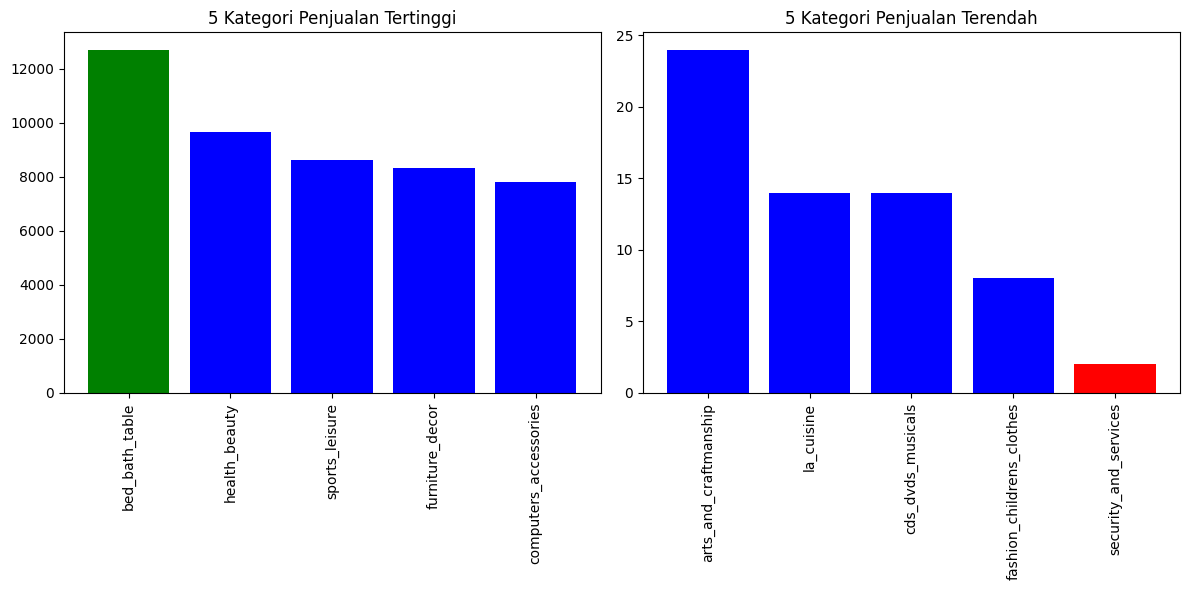

In [60]:
color1 = ['green','blue','blue','blue','blue']
color2 = ['blue','blue','blue','blue','red']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot pertama (kategori_head)
axes[0].bar(kategori_head.index, kategori_head.values, color=color1)
axes[0].set_xticks(kategori_head.index)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('5 Kategori Penjualan Tertinggi')



# Plot kedua (kategori_tail)
axes[1].bar(kategori_tail.index, kategori_tail.values,color = color2)
axes[1].set_xticks(kategori_tail.index)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('5 Kategori Penjualan Terendah')

    
# Menampilkan plot
plt.tight_layout()
plt.show()

**Trend Penjualan Top 5 kategori** 

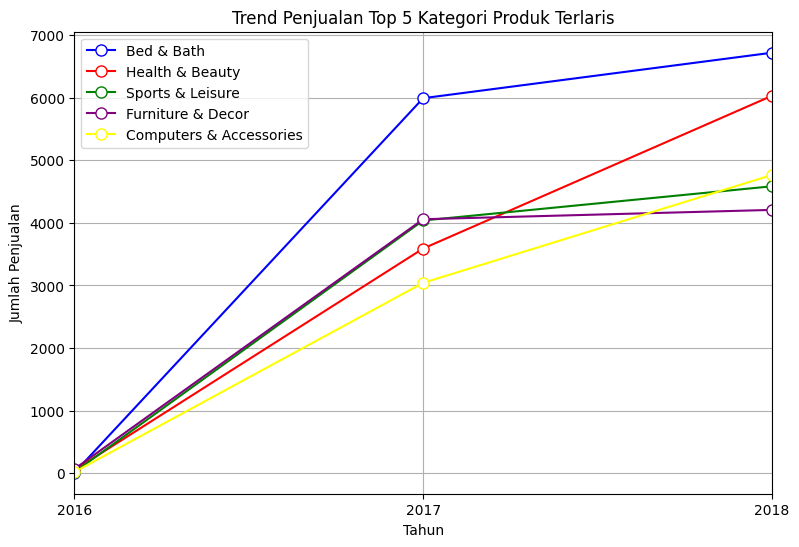

In [61]:
plt.figure(figsize=(9, 6))

# Plot kategori 1
sales_kategory1_trend.plot(kind='line', marker='o', color='blue', markerfacecolor='white', markersize=8, label='Bed & Bath')

# Plot kategori 2
sales_kategory2_trend.plot(kind='line', marker='o', color='red', markerfacecolor='white', markersize=8, label='Health & Beauty')

# Plot kategori 3
sales_kategory3_trend.plot(kind='line', marker='o', color='green', markerfacecolor='white', markersize=8, label='Sports & Leisure')

# Plot kategori 4
sales_kategory4_trend.plot(kind='line', marker='o', color='purple', markerfacecolor='white', markersize=8, label='Furniture & Decor')

# Plot kategori 5
sales_kategory5_trend.plot(kind='line', marker='o', color='yellow', markerfacecolor='white', markersize=8, label='Computers & Accessories')

plt.title('Trend Penjualan Top 5 Kategori Produk Terlaris')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.legend()  
plt.show()

**Conclusion**

Analisis penjualan kategori produk menunjukkan perbedaan signifikan antara kategori dengan penjualan tertinggi dan terendah. Kategori dengan penjualan tinggi seperti perabotan rumah tangga, produk kesehatan & kecantikan, dan perlengkapan olahraga menunjukkan minat kuat dari pelanggan dan memiliki posisi kuat di pasar. 

5 Kategori teratas semakin populer di kalangan konsumen seiring berjalannya waktu. Oleh karena itu, perusahaan dapat mempertimbangkan untuk meningkatkan stok produk dalam kategori ini atau mencari cara untuk memaksimalkan penjualan, seperti dengan menjalankan promosi atau diskon khusus.

Sebaliknya, kategori dengan penjualan rendah seperti seni & kerajinan, hiburan seperti CD & DVD, dan produk keamanan & layanan menunjukkan kurangnya minat konsumen. 

Strategi penjualan perlu ditingkatkan untuk kategori ini, termasuk melakukan kampanye pemasaran yang lebih agresif, melakukan riset pasar dan perluas variasi produk, serta meninjau kembali stok produk. Dengan strategi ini, perusahaan dapat meningkatkan daya saingnya, meningkatkan pendapatan, dan memperkuat posisi di pasar.

---

## Mengidentifikasi Kategori produk mana saja yang paling tinggi tingkat pembatalan oleh pembeli

**Perbandingan status oder Kategori**

In [62]:
pd.DataFrame(kategori_count)

,count
order_status,
delivered,110151
canceled,7


**Kategori produk yang mengalami pembatalan**

In [63]:
pd.DataFrame(kategori_batal[['product_category','order_status']].value_counts())

,,count
product_category,order_status,
health_beauty,canceled,2
perfumery,canceled,2
fashion_bags_accessories,canceled,1
sports_leisure,canceled,1
toys,canceled,1


**Conclusion**

Dengan perbandingan yang signifikan antara jumlah produk yang terkirim dan yang dibatalkan, terlihat bahwa hanya sedikit, yaitu 7 produk dalam 5 kategori, yang mengalami pembatalan. Perbedaan yang mencolok ini menunjukkan bahwa mayoritas produk dalam kategori saya berhasil dikirim tanpa ada masalah yang signifikan

---

## Mengidentifikasi Kota dengan customer yang melakukan order paling banyak

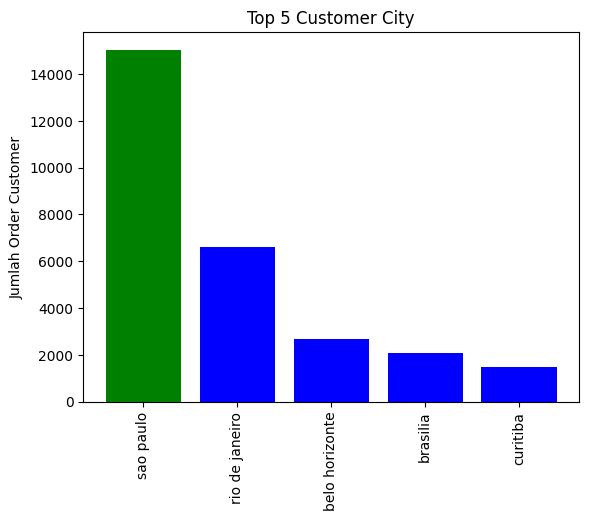

In [64]:
plt.title('Top 5 Customer City')
plt.bar(x = customer_city.index, height = customer_city.values, color = color1)
plt.ylabel('Jumlah Order Customer')
plt.xticks(rotation=90)
plt.show()

**Conclusion**

Dalam analisis kami terhadap data pemesanan pelanggan, terdapat lima kota yang menonjol dengan jumlah pemesanan yang tinggi, yaitu São Paulo, Rio de Janeiro, Belo Horizonte, Brasília, dan Curitiba. Hal ini menunjukkan bahwa kota-kota ini memiliki kontribusi signifikan dalam jumlah pemesanan pelanggan, memberikan gambaran yang kuat tentang sebaran aktivitas pembelian yang tinggi di wilayah-wilayah ini.

Dengan mengetahui kota-kota ini sebagai pusat aktivitas pemesanan yang tinggi, strategi bisnis dapat difokuskan untuk mengoptimalkan layanan dan distribusi di wilayah-wilayah ini. Penekanan pada ketersediaan produk, efisiensi pengiriman, serta peningkatan layanan pelanggan di kota-kota ini dapat menjadi langkah strategis untuk memperluas basis pelanggan dan meningkatkan performa bisnis secara keseluruhan

---

## Mengidentifikasi Kota dengan jumlah seller paling banyak

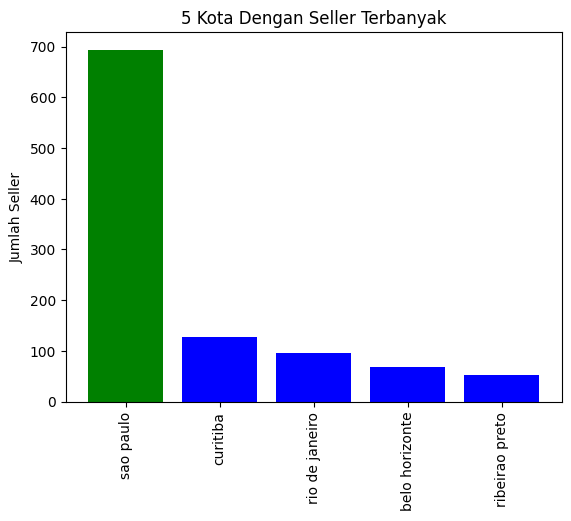

In [65]:
plt.title('5 Kota Dengan Seller Terbanyak')
plt.bar(x=seller_city.index, height = seller_city.values, color = color1)
plt.ylabel('Jumlah Seller')
plt.xticks(rotation=90)
plt.show()

**Conclusion**


Kehadiran penjual yang signifikan di beberapa kota menunjukkan adanya peluang bisnis yang luas. Dengan memfokuskan kerja sama pada penjual di wilayah tersebut, kita dapat meningkatkan ketersediaan produk, mengoptimalkan efisiensi pengiriman, dan memperluas jangkauan layanan ke pelanggan. Langkah-langkah ini akan berkontribusi pada penguatan pangsa pasar dan peningkatan daya saing bisnis.

Melalui identifikasi kota-kota dengan kehadiran penjual yang kuat, kita dapat mengembangkan strategi ekspansi yang terarah. Kemitraan strategis dengan penjual ini akan memperkuat infrastruktur penjualan, memperkaya variasi produk, dan meningkatkan daya tarik serta efisiensi operasional bisnis kita secara keseluruhan.

---